### The objectives of this project are:

- check for missing values and make decision on how to handle them
- Generate categorical variable with age.
- Exploratory analysis of the data
- Review the numerical variables ,and scale variables if necessary
- Are there variables have some degree of symmetry? Apply some transformation to have a more symmmetric variable
- Are there categorical variables in the dataset?pass them to numbers.


## Installing and importing libraries

In [1]:
#import packages needed
import pandas as pd
import numpy as np
import mysql.connector as sql
import matplotlib.pyplot as plt
import seaborn as sns

## creating sql connection and connecting to database

In [2]:
conn = sql.connect(host= 'localhost' , 
                   user='root',
                   passwd='root',
                   use_pure=True,
                  database='heartdt')
print(conn)

## Read in file as dataframe

In [3]:
#read the csv 
data = pd.read_sql_query('''SELECT * FROM heartdt.heart''', conn)

heart_df = pd.DataFrame(data)
heart_df.head()

C:\Users\USER\AppData\Local\Temp\ipykernel_15920\515001348.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data = pd.read_sql_query('''SELECT * FROM heartdt.heart''', conn)


,MyUnknownColumn,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0,normal,No


In [4]:
#shape of heart_df
heart_df.shape

(299, 15)

## Checking and Handling missing values

In [5]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MyUnknownColumn  299 non-null    int64  
 1   Age              299 non-null    int64  
 2   Sex              299 non-null    int64  
 3   ChestPain        299 non-null    object 
 4   RestBP           299 non-null    int64  
 5   Chol             299 non-null    int64  
 6   Fbs              299 non-null    int64  
 7   RestECG          299 non-null    int64  
 8   MaxHR            299 non-null    int64  
 9   ExAng            299 non-null    int64  
 10  Oldpeak          299 non-null    float64
 11  Slope            299 non-null    int64  
 12  Ca               299 non-null    int64  
 13  Thal             299 non-null    object 
 14  AHD              299 non-null    object 
dtypes: float64(1), int64(11), object(3)
memory usage: 35.2+ KB


In [6]:
#check for missing values 
heart_df.isna().sum()

MyUnknownColumn    0
Age                0
Sex                0
ChestPain          0
RestBP             0
Chol               0
Fbs                0
RestECG            0
MaxHR              0
ExAng              0
Oldpeak            0
Slope              0
Ca                 0
Thal               0
AHD                0
dtype: int64

## Generate a Categorical Variable with Age

In [7]:
#check for the number of unique ages in the age category
print('Count of unique ages :', heart_df['Age'].nunique())

print('\n')
#check for the unique ages in the age category
print('unique ages :', heart_df['Age'].unique())

Count of unique ages : 41


unique ages : [63 67 37 41 56 62 57 53 44 52 48 54 49 64 58 60 50 66 43 40 69 59 42 55
 61 65 71 51 46 45 39 68 47 34 35 29 70 77 38 74 76]


In [8]:
#Explore the Age column using the describe function
print(heart_df['Age'].describe())

print('\n')

#create bins for the various age categories
twenty_fifth = heart_df['Age'].quantile(0.25)
median = heart_df['Age'].median()
seventy_fifth = heart_df['Age'].quantile(0.75)
maximum = heart_df['Age'].max()

#create a label and bins for the various age categories
labels = ['young_adult','middle_age','older_adult','elderlies']
bins = [0, twenty_fifth, median, seventy_fifth, maximum]

#create a category column for age
heart_df['Age_cat'] = pd.cut(heart_df['Age'], labels=labels, bins=bins)

count    299.000000
mean      54.528428
std        9.020950
min       29.000000
25%       48.000000
50%       56.000000
75%       61.000000
max       77.000000
Name: Age, dtype: float64




In [9]:
#show table showing the Age and Age_cat columns side by side
heart_df[['Age','Age_cat']]

,Age,Age_cat
0,63,elderlies
1,67,elderlies
2,67,elderlies
3,37,young_adult
4,41,young_adult
...,...,...
294,57,older_adult
295,45,young_adult
296,68,elderlies
297,57,older_adult


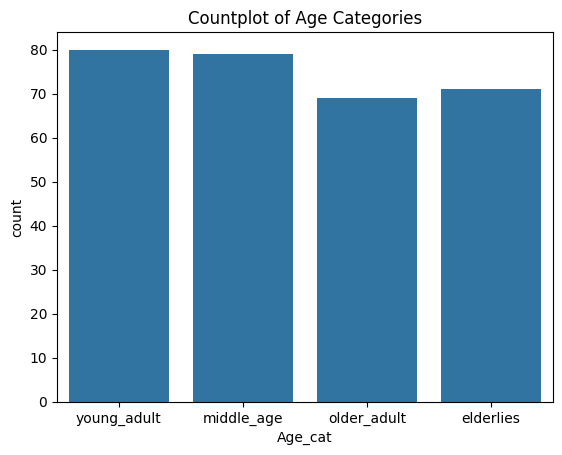

In [10]:
#visualization of the Age_cat column
sns.countplot(x='Age_cat',data=heart_df)
plt.title('Countplot of Age Categories')
plt.show()

## Data Cleaning

The dataset contained 299 rows and 15 columns, and these were what I did to the columns:
 - From the graph above it shows that there was no missing data .
 
 - The data types were changed to the accurate type were necessary.
 
 - created a new column containing age categories
 
At the end there was 299 rows and 16 columns .

## Exploratory Data Analysis

In [11]:
#read data 
heart_df.head()

,MyUnknownColumn,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD,Age_cat
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0,fixed,No,elderlies
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3,normal,Yes,elderlies
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2,reversable,Yes,elderlies
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0,normal,No,young_adult
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0,normal,No,young_adult


In [12]:
#create categorical column for sex and angina by exercice(ExAng) columns
heart_df['Sex_cat'] = np.where(heart_df['Sex']==1,'Male','Female')
heart_df['ExAng_cat'] = np.where(heart_df['ExAng']==1, 'yes', 'no')

heart_df.head()

,MyUnknownColumn,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD,Age_cat,Sex_cat,ExAng_cat
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0,fixed,No,elderlies,Male,no
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3,normal,Yes,elderlies,Male,yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2,reversable,Yes,elderlies,Male,yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0,normal,No,young_adult,Male,no
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0,normal,No,young_adult,Female,no


C:\Users\USER\AppData\Local\Temp\ipykernel_15920\1652528712.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0,0].set_xticklabels(axs[0,0].get_xticklabels(), rotation=90)
C:\Users\USER\AppData\Local\Temp\ipykernel_15920\1652528712.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0,1].set_xticklabels(axs[0,1].get_xticklabels(), rotation=90)


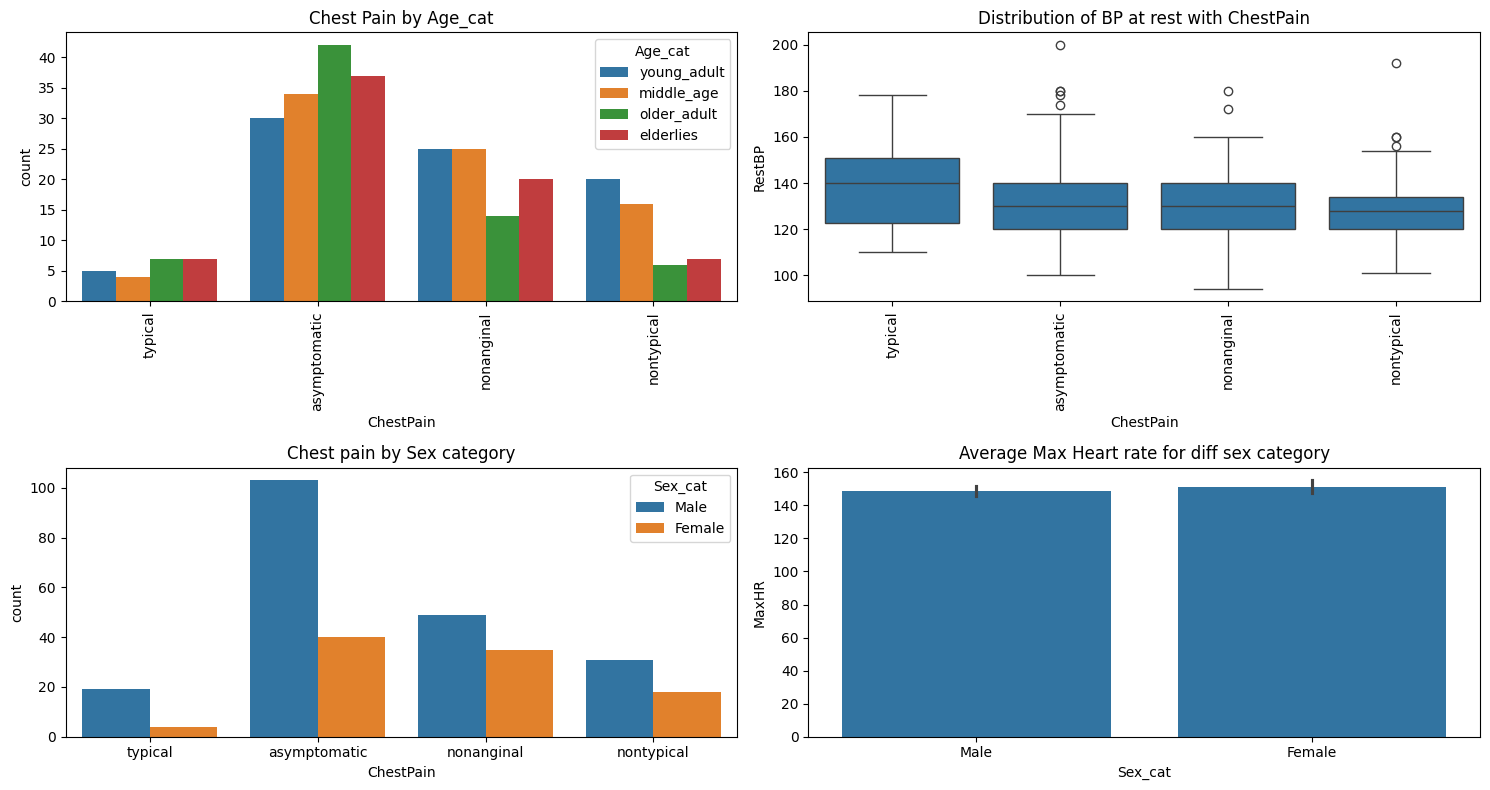

In [13]:
#exploring the various categorical columns 

fig,axs = plt.subplots(nrows=2, ncols=2, sharey=False,figsize=(15,8))
fig.subplots_adjust(hspace=0.5)

g = sns.countplot(x='ChestPain',hue='Age_cat',data=heart_df, ax=axs[0,0])
g.set_title('Chest Pain by Age_cat')
axs[0,0].set_xticklabels(axs[0,0].get_xticklabels(), rotation=90)
g = sns.boxplot(x='ChestPain', y='RestBP', data=heart_df, ax=axs[0,1])
g.set_title('Distribution of BP at rest with ChestPain')
axs[0,1].set_xticklabels(axs[0,1].get_xticklabels(), rotation=90)
g = sns.countplot(x='ChestPain',hue ='Sex_cat',data=heart_df, ax=axs[1,0])
g.set_title('Chest pain by Sex category')
g = sns.barplot(y='MaxHR',x='Sex_cat',data=heart_df, ax=axs[1,1])
g.set_title('Average Max Heart rate for diff sex category')
fig.tight_layout()
plt.show()

In [14]:
#value counting various age categories for sex
age_cat_count = heart_df[['Sex_cat','Age_cat']].value_counts(normalize=True, sort=True).to_frame()
age_cat_count

proportion
Sex_cat Age_cat                
Male    young_adult    0.193980
        middle_age     0.180602
        older_adult    0.170569
        elderlies      0.130435
Female  elderlies      0.107023
        middle_age     0.083612
        young_adult    0.073579
        older_adult    0.060201

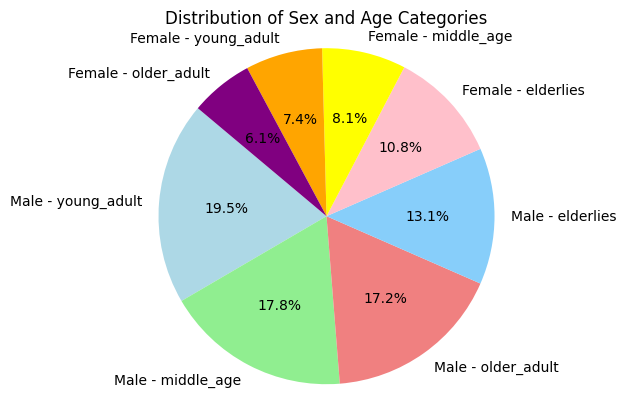

In [15]:
# Data for the pie chart
sex_age_data = {
    ('Male', 'young_adult'): 0.195286,
    ('Male', 'middle_age'): 0.178451,
    ('Male', 'older_adult'): 0.171717,
    ('Male', 'elderlies'): 0.131313,
    ('Female', 'elderlies'): 0.107744,
    ('Female', 'middle_age'): 0.080808,
    ('Female', 'young_adult'): 0.074074,
    ('Female', 'older_adult'): 0.060606,
}

# Create a figure and axis
fig, ax = plt.subplots()

# Data for the pie chart
labels = [f"{sex} - {age}" for sex, age in sex_age_data.keys()]
sizes = list(sex_age_data.values())

# Colors for the pie chart
colors = ['lightblue', 'lightgreen', 'lightcoral', 'lightskyblue', 'pink', 'yellow', 'orange', 'purple']

# Plot the pie chart
ax.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)

# Aspect ratio to make the pie circular
ax.axis('equal')

# Title for the pie chart
plt.title('Distribution of Sex and Age Categories')

# Show the pie chart
plt.show()


In [16]:
#describing the categorical columns
heart_df.describe(exclude=[np.number])

,ChestPain,Thal,AHD,Age_cat,Sex_cat,ExAng_cat
count,299,299,299,299,299,299
unique,4,4,2,4,2,2
top,asymptomatic,normal,No,young_adult,Male,no
freq,143,164,161,80,202,201


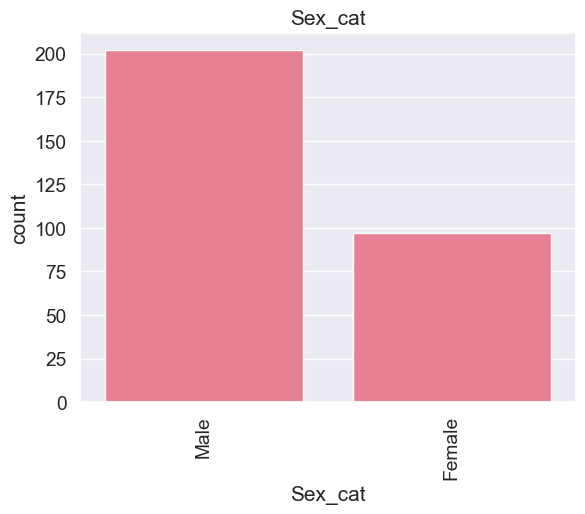

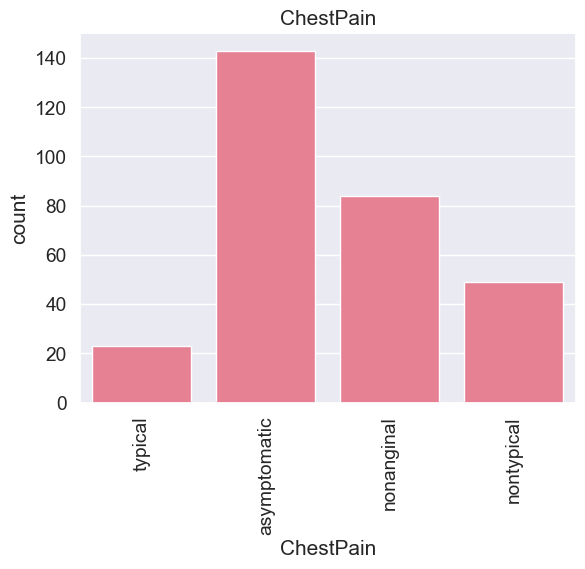

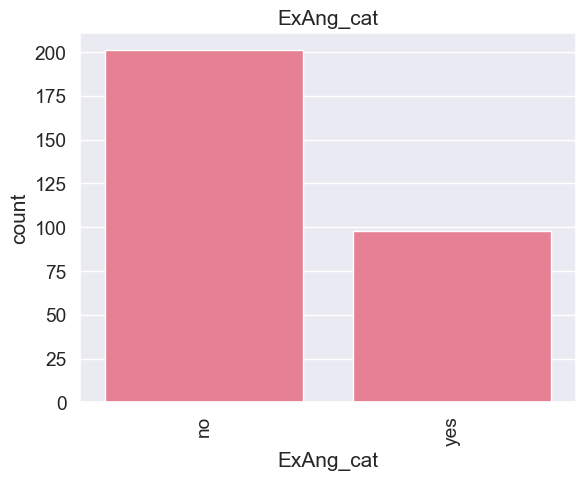

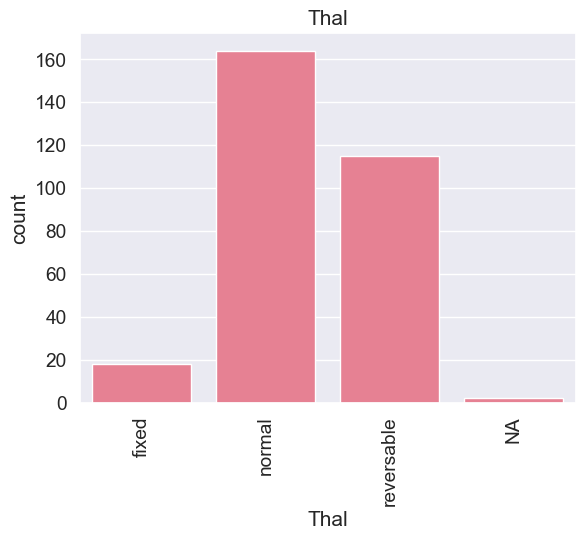

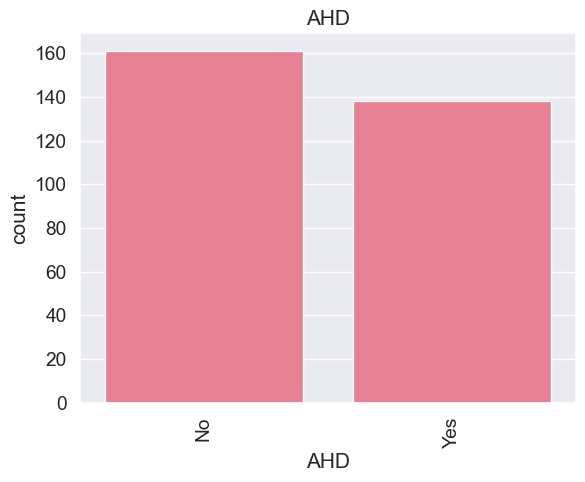

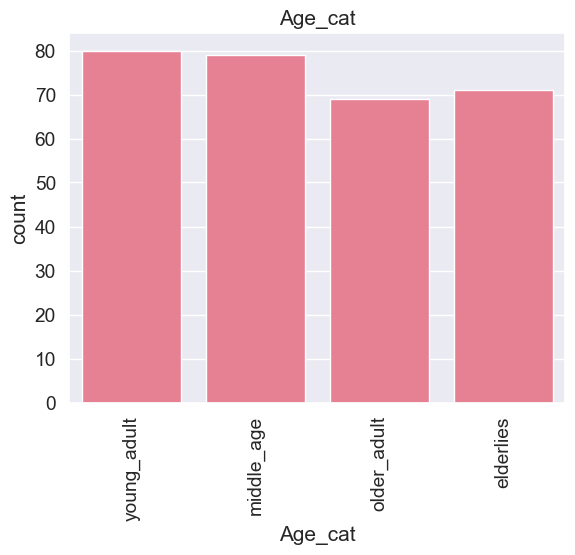

In [17]:
#visualize the information above for easy understanding
#value counting the categorical columns

columns = ['Sex_cat','ChestPain','ExAng_cat','Thal','AHD','Age_cat']

sns.set(style='darkgrid',font_scale=1.25)
sns.set_palette('husl',3)

def plot_cat_count():
    for c in columns:
        sns.countplot(x=c, data=heart_df)
        plt.title(c)
        plt.xticks(rotation=90)
        plt.show()
        
plot_cat_count()

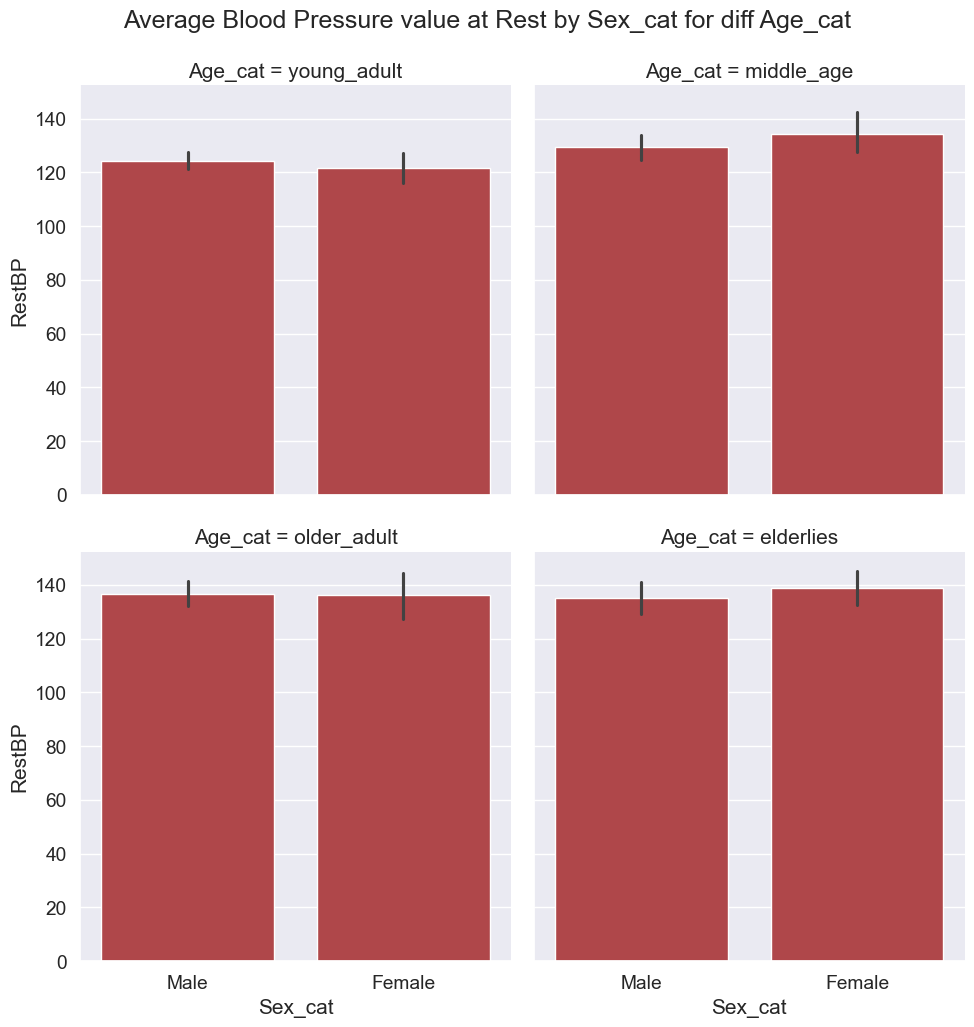

In [18]:
#visualizig Blood pressure at rest by Sex for the different age categories
sns.set_palette('RdBu')
g = sns.catplot(x='Sex_cat',y='RestBP',data=heart_df,kind='bar',col='Age_cat',col_wrap=2)
g.fig.suptitle('Average Blood Pressure value at Rest by Sex_cat for diff Age_cat', y=1.03)
plt.show()

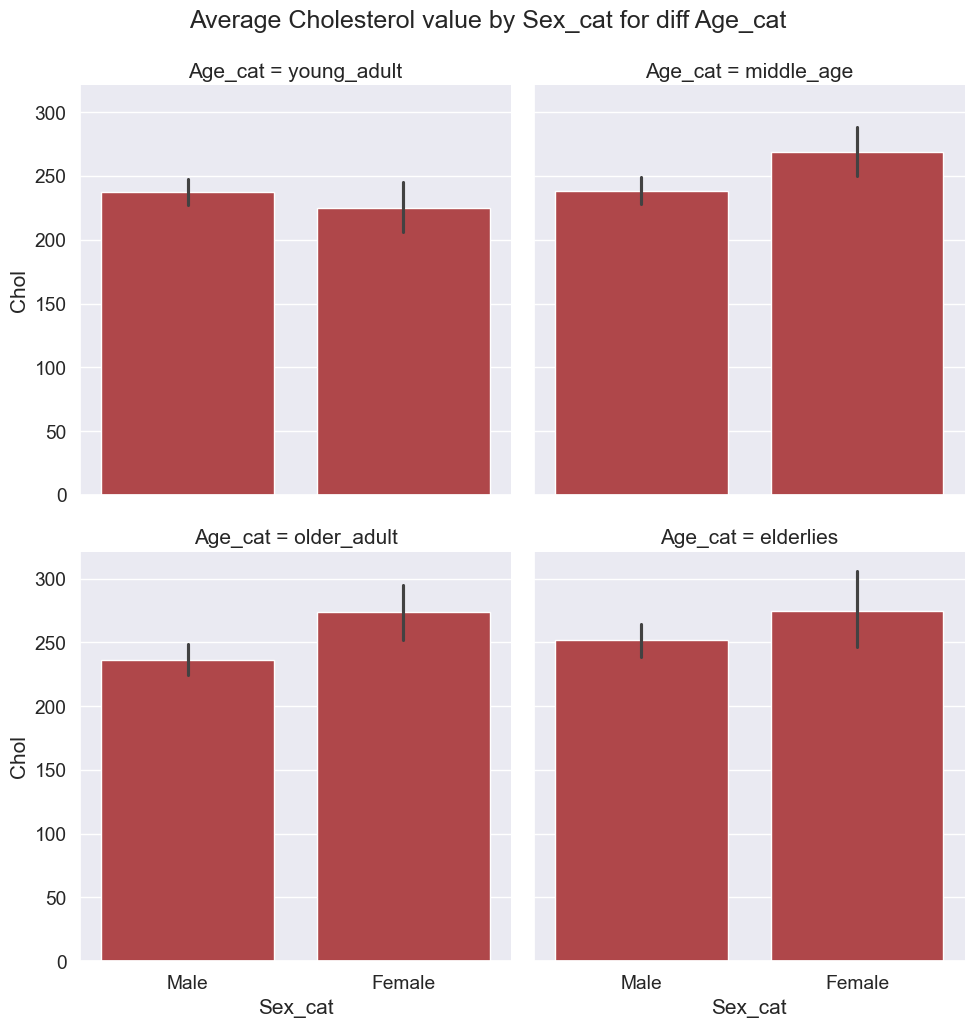

In [19]:
#visualizig Cholesterol by Sex for the different age categories
sns.set_palette('RdBu')
g = sns.catplot(x='Sex_cat',y='Chol',data=heart_df,kind='bar',col='Age_cat',col_wrap=2)
g.fig.suptitle('Average Cholesterol value by Sex_cat for diff Age_cat', y=1.03)
plt.show()

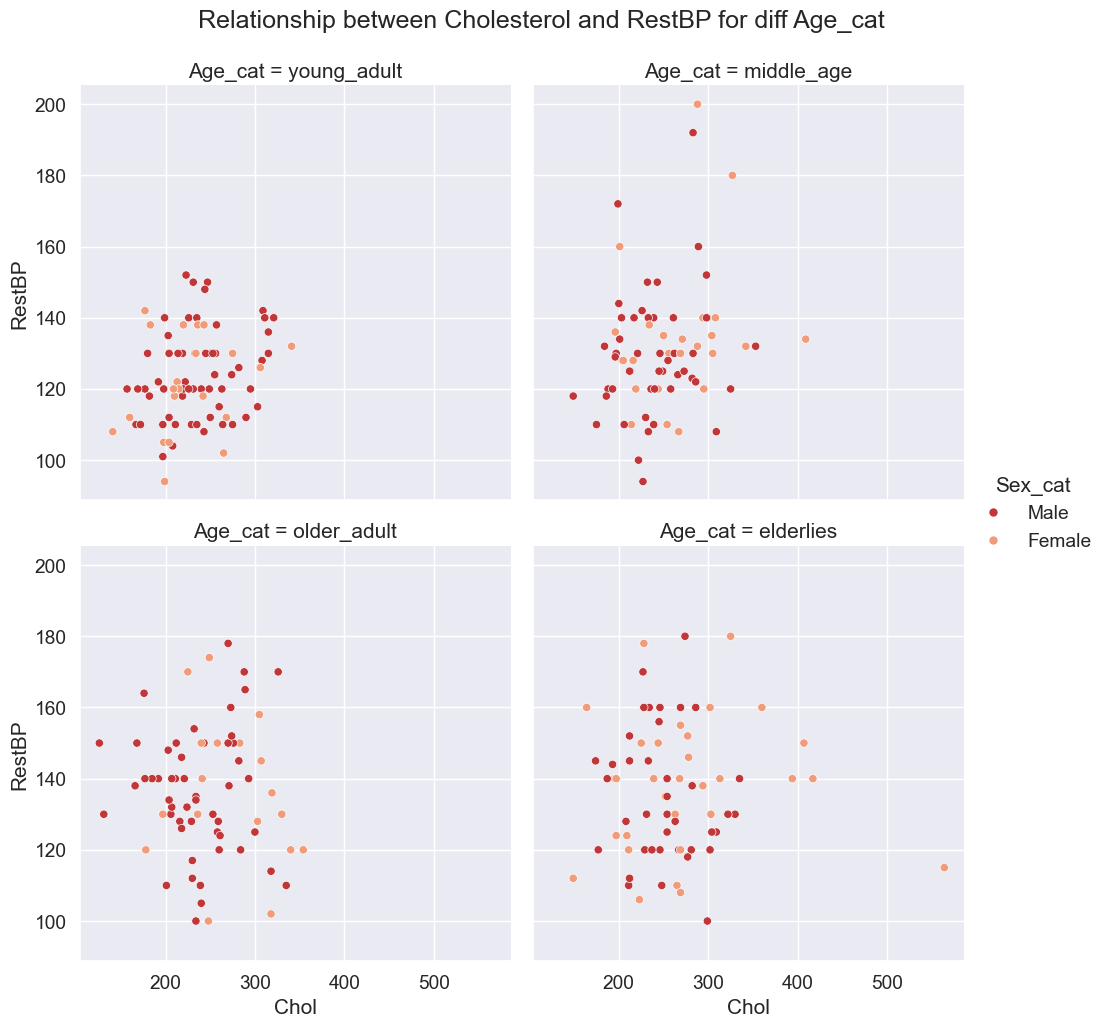

In [20]:
#visualizig RestBP by Chol for the different age categories
sns.set_style('darkgrid')
g = sns.relplot(x='Chol',y='RestBP',data=heart_df,hue='Sex_cat',col='Age_cat',col_wrap=2)
g.fig.suptitle('Relationship between Cholesterol and RestBP for diff Age_cat', y=1.03)
plt.show()

**from the visualizations above :**

- More person(both male and female and across all age categories) experienced asymtomatic angina(chest pain) while few people experienced typical angina.

- From the distribution of BP at rest with Angina it shows that Persons with high blood pressure(BP) had typical angina 

- Males tend to have Angina than females (but this might be seen a result of imbalance within the number of male and female for this dataset), Also most males had asymptomatic Angina(Chest pain).

- The average heart rate for female was slightly higher than that of male

- On average the female Blood pressure tend to increase over the years than male

- On average the female Cholesterol value also tend to increase over the years than male

- There is a relationship between Cholesterol value and RestBP, as Cholesterol value increased Blood Presure at Rest also tend to increase.


## Review and scale numeric variable if necessary

In [21]:
#drop the unnamed column
heart_df.drop(columns=['MyUnknownColumn'], inplace=True)

#checking for the types of the data column

heart_df.describe()

,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000
mean,54.528428,0.675585,131.668896,247.100334,0.147157,0.996656,149.505017,0.327759,1.051839,1.602007,0.672241
std,9.020950,0.468941,17.705668,51.914779,0.354856,0.994948,22.954927,0.470183,1.163809,0.617526,0.937438
min,29.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,130.000000,242.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,140.000000,275.500000,0.000000,2.000000,165.500000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000


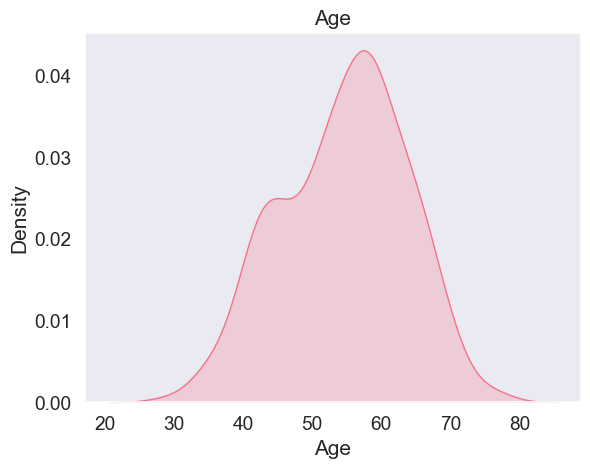

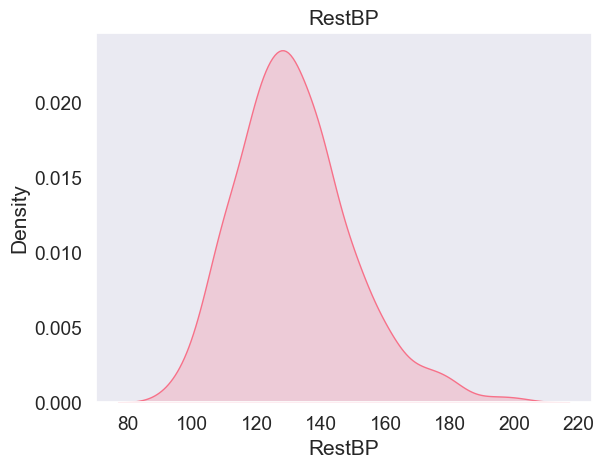

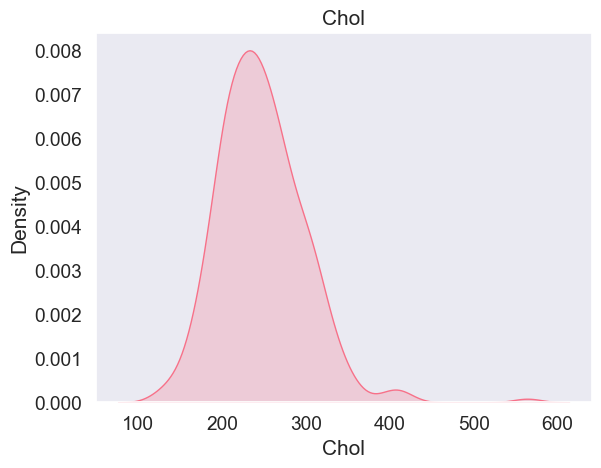

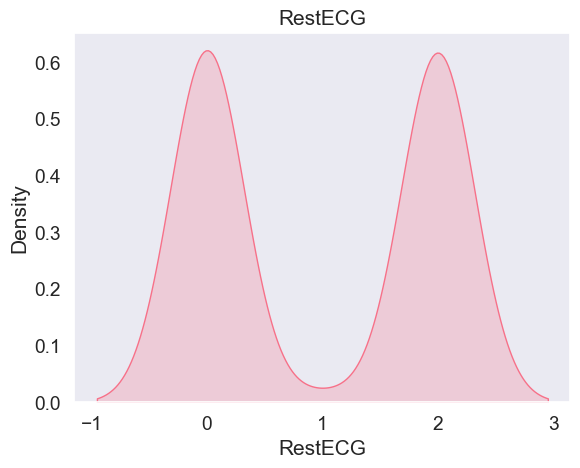

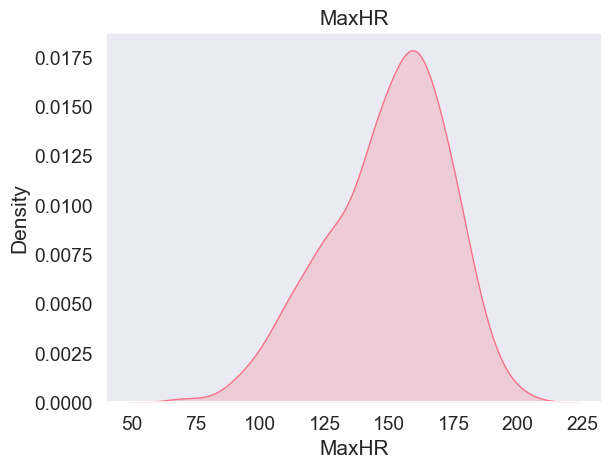

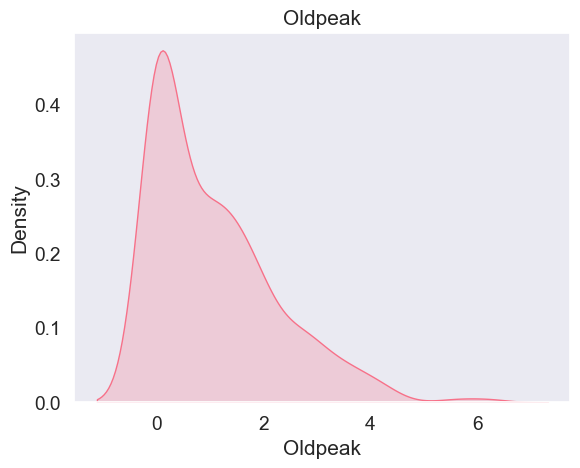

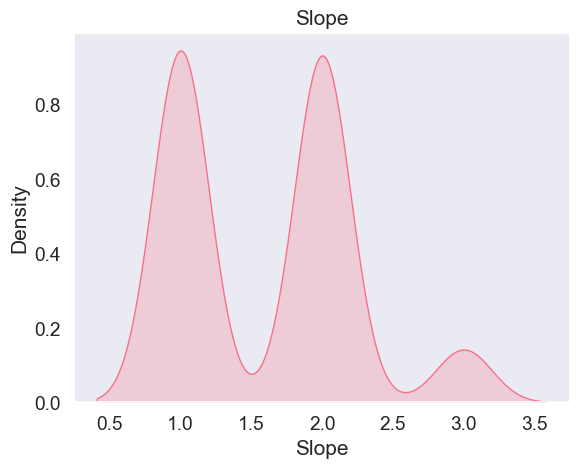

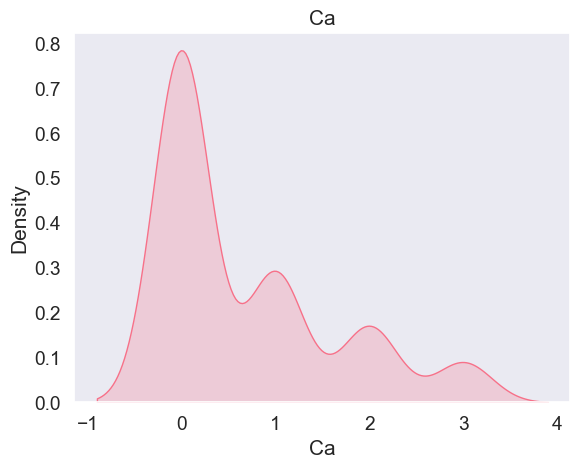

In [22]:
#visualize the information above for easy understanding
#value counting the categorical columns

columns = ['Age','RestBP','Chol','RestECG','MaxHR','Oldpeak','Slope','Ca']

sns.set(style='dark',font_scale=1.25)
sns.set_palette('husl',3)

def plot_dist_count():
    for c in columns:
        #sns.distplot(heart_df[c], kde=True)
        sns.kdeplot(heart_df[c], fill=True)
        plt.title(c)
        plt.show()
        
plot_dist_count()

## Using Normalization to scale variables 

In [23]:
#checking for the variance
columns = ['Age','RestBP','Chol','RestECG','MaxHR','Oldpeak','Slope','Ca']

heart_df[columns].var()

Age          81.377545
RestBP      313.490674
Chol       2695.144262
RestECG       0.989922
MaxHR       526.928666
Oldpeak       1.354451
Slope         0.381338
Ca            0.878791
dtype: float64

In [24]:
#normalizing to scale the columns with high variance
heart_df[['Age','RestBP','Chol','MaxHR']] = np.log(heart_df[['Age','RestBP','Chol','MaxHR']])

#checking variance after scaling
columns = ['Age','RestBP','Chol','RestECG','MaxHR','Oldpeak','Slope','Ca']
heart_df[columns].var()

Age        0.030122
RestBP     0.017262
Chol       0.041527
RestECG    0.989922
MaxHR      0.027298
Oldpeak    1.354451
Slope      0.381338
Ca         0.878791
dtype: float64

## Using Standardization to scale variables

In [25]:
Columns = ['Age','Sex','RestBP','Chol','Fbs','RestECG','MaxHR','ExAng','Oldpeak','Slope','Ca']

X_val = heart_df[['Age','Sex','RestBP','Chol','Fbs','RestECG','MaxHR','ExAng','Oldpeak','Slope','Ca']].values

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_val)

print(X_scaled)

[[ 0.9170957   0.69296322  0.80169126 ...  1.07427684  2.26765706
  -0.71830622]
 [ 1.27237613  0.69296322  1.55220299 ...  0.38572641  0.64557701
   2.48726932]
 [ 1.27237613  0.69296322 -0.64109862 ...  1.33248325  0.64557701
   1.41874414]
 ...
 [ 1.35788117  0.69296322  0.74892948 ...  2.02103367  0.64557701
   1.41874414]
 [ 0.33946556  0.69296322 -0.03084926 ...  0.12752     0.64557701
   0.35021896]
 [ 0.33946556 -1.44307804 -0.03084926 ... -0.90530564  0.64557701
   0.35021896]]


In [26]:
#creating the scaled dataframe as df
df = pd.DataFrame(data=X_scaled, columns=Columns)
df

,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca
0,0.917096,0.692963,0.801691,-0.186270,2.407375,1.010130,0.098233,-0.698257,1.074277,2.267657,-0.718306
1,1.272376,0.692963,1.552203,0.821160,-0.415390,1.010130,-1.893376,1.432138,0.385726,0.645577,2.487269
2,1.272376,0.692963,-0.641099,-0.271388,-0.415390,1.010130,-0.816155,1.432138,1.332483,0.645577,1.418744
3,-2.154585,0.692963,-0.030849,0.159885,-0.415390,-1.003395,1.434888,-0.698257,2.107102,2.267657,-0.718306
4,-1.562119,-1.443078,-0.030849,-0.839619,-0.415390,1.010130,0.927963,-0.698257,0.299658,-0.976503,-0.718306
...,...,...,...,...,...,...,...,...,...,...,...
294,0.339466,-1.443078,0.534153,-0.020333,-0.415390,-1.003395,-1.104908,1.432138,-0.733168,0.645577,-0.718306
295,-1.024849,0.692963,-1.304477,0.427717,-0.415390,-1.003395,-0.676778,-0.698257,0.127520,0.645577,-0.718306
296,1.357881,0.692963,0.748929,-1.112080,2.407375,-1.003395,-0.276897,-0.698257,2.021034,0.645577,1.418744
297,0.339466,0.692963,-0.030849,-3.016768,-0.415390,-1.003395,-1.512635,1.432138,0.127520,0.645577,0.350219


In [27]:
#checking variance after scaling
df.var()

Age        1.003356
Sex        1.003356
RestBP     1.003356
Chol       1.003356
Fbs        1.003356
RestECG    1.003356
MaxHR      1.003356
ExAng      1.003356
Oldpeak    1.003356
Slope      1.003356
Ca         1.003356
dtype: float64

***Based on the provided numerical variable information, it appears that some of the variables may benefit from scaling. Variables like 'Age', 'RestBP', 'Chol', 'RestECG', 'MaxHR', 'Oldpeak', and 'Ca' have different scales and ranges.***

***Scaling is typically useful when applying certain machine learning algorithms that are sensitive to the scale of the variables. It helps to ensure that all variables contribute equally to the model and prevents any bias that may arise due to differences in scale.***

***Therefore To scale the variables, I will be using two different techniques such as standardization (subtracting the mean and dividing by the standard deviation) and normalizing() to show how to scale variables*** 

***Kindly Note that you dont necessarily have to use both method when scaling , I used both just to show how it can be done in the different ways***

***Also, Keep in mind that scaling is not always mandatory, and it depends on the specific context and objectives of your analysis or modeling task.***

## Are there categorical variables in the dataset? pass them to numbers.

In [28]:
#read the normalized heart_df data
heart_df.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD,Age_cat,Sex_cat,ExAng_cat
0,4.143135,1,typical,4.976734,5.451038,1,2,5.010635,0,2.3,3,0,fixed,No,elderlies,Male,no
1,4.204693,1,asymptomatic,5.075174,5.655992,0,2,4.682131,1,1.5,2,3,normal,Yes,elderlies,Male,yes
2,4.204693,1,asymptomatic,4.787492,5.433722,0,2,4.859812,1,2.6,2,2,reversable,Yes,elderlies,Male,yes
3,3.610918,1,nonanginal,4.867534,5.521461,0,0,5.231109,0,3.5,3,0,normal,No,young_adult,Male,no
4,3.713572,0,nontypical,4.867534,5.318120,0,2,5.147494,0,1.4,1,0,normal,No,young_adult,Female,no


In [29]:
#drop all columns not needed
#dropping Age column and use Age_cat inplace
heart_df.drop(columns=['Sex_cat','ExAng_cat','Age'], inplace=True)

#read data
heart_df.head()

,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD,Age_cat
0,1,typical,4.976734,5.451038,1,2,5.010635,0,2.3,3,0,fixed,No,elderlies
1,1,asymptomatic,5.075174,5.655992,0,2,4.682131,1,1.5,2,3,normal,Yes,elderlies
2,1,asymptomatic,4.787492,5.433722,0,2,4.859812,1,2.6,2,2,reversable,Yes,elderlies
3,1,nonanginal,4.867534,5.521461,0,0,5.231109,0,3.5,3,0,normal,No,young_adult
4,0,nontypical,4.867534,5.318120,0,2,5.147494,0,1.4,1,0,normal,No,young_adult


In [30]:
#using pd.get_dummies to replace categorical variables to numerical

pd.get_dummies(heart_df)

,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,...,Thal_NA,Thal_fixed,Thal_normal,Thal_reversable,AHD_No,AHD_Yes,Age_cat_young_adult,Age_cat_middle_age,Age_cat_older_adult,Age_cat_elderlies
0,1,4.976734,5.451038,1,2,5.010635,0,2.3,3,0,...,False,True,False,False,True,False,False,False,False,True
1,1,5.075174,5.655992,0,2,4.682131,1,1.5,2,3,...,False,False,True,False,False,True,False,False,False,True
2,1,4.787492,5.433722,0,2,4.859812,1,2.6,2,2,...,False,False,False,True,False,True,False,False,False,True
3,1,4.867534,5.521461,0,0,5.231109,0,3.5,3,0,...,False,False,True,False,True,False,True,False,False,False
4,0,4.867534,5.318120,0,2,5.147494,0,1.4,1,0,...,False,False,True,False,True,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,0,4.941642,5.484797,0,0,4.812184,1,0.2,2,0,...,False,False,False,True,False,True,False,False,True,False
295,1,4.700480,5.575949,0,0,4.882802,0,1.2,2,0,...,False,False,False,True,False,True,True,False,False,False
296,1,4.969813,5.262690,1,0,4.948760,0,3.4,2,2,...,False,False,False,True,False,True,False,False,False,True
297,1,4.867534,4.875197,0,0,4.744932,1,1.2,2,1,...,False,False,False,True,False,True,False,False,True,False


**After I pass categorical variable to numbers there was 24 columns at the end .**

**Also note the Age column was dropped to avoid overfitting as the Age categorical column contained same information .**

## Summary

Summary of Heart Dataset Exploration:

1. **Initial Dataset Overview:**
   - The dataset initially contained 299 rows and 15 columns.

2. **Data Preprocessing Steps:**
   - No missing data was observed in the dataset.
   - Corrected data types as necessary for accurate representation.
   - Introduced a new column categorizing age.

3. **Post-Processing Dataset:**
   - After preprocessing, the dataset consisted of 299 rows and 16 columns.

4. **Angina Distribution:**
   - Asymptomatic angina (chest pain) was more prevalent across all age categories, with fewer instances of typical angina.

5. **Blood Pressure and Angina:**
   - Individuals with high blood pressure tended to experience typical angina.

6. **Gender Differences:**
   - Males exhibited a higher frequency of angina than females, potentially influenced by dataset gender imbalances.
   - Most males experienced asymptomatic angina.

7. **Heart Rate Differences:**
   - Average heart rate was slightly higher in females than males.

8. **Blood Pressure and Cholesterol Trends:**
   - Over the years, females showed an increase in both average blood pressure and cholesterol levels compared to males.

9. **Cholesterol and RestBP Relationship:**
   - There was a positive relationship between cholesterol values and resting blood pressure, indicating that as cholesterol values increased, resting blood pressure tended to increase as well.

10. **Variable Scaling:**
    - Identified the need for scaling due to differing scales and ranges in numerical variables like 'Age', 'RestBP', 'Chol', 'RestECG', 'MaxHR', 'Oldpeak', and 'Ca'.
    - Demonstrated the use of both standardization and normalization techniques for scaling.

11. **Categorical Variable Transformation:**
    - Transformed categorical variables into numerical representations.
    - Resulted in a dataset with 24 columns.

12. **Age Column Handling:**
    - The 'Age' column was dropped to prevent overfitting, considering redundancy with the newly introduced categorical age column.

This exploratory analysis provides valuable insights into the dataset, showcasing patterns, trends, and potential relationships. The preprocessing steps and visualizations contribute to a better understanding of the data, setting the stage for further analysis or modeling tasks.